## Problem Statement

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

import statsmodels.stats.tests.test_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
cars = pd.read_csv('ToyotaCorolla.csv')
cars.shape

(1436, 38)

In [18]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [24]:
cars_data = cars[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
cars_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [25]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [26]:
cars_data.isna().any().sum()

0

In [27]:
cars_data.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Quarterly_Tax,1436.0,87.122563,41.128611,19.0,69.0,85.0,85.00,283.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [29]:
cars_data[cars_data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [33]:
cars_data.drop_duplicates(inplace = True)
cars_data.shape

(1435, 9)

##### Correalation Analysis

In [34]:
cars_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


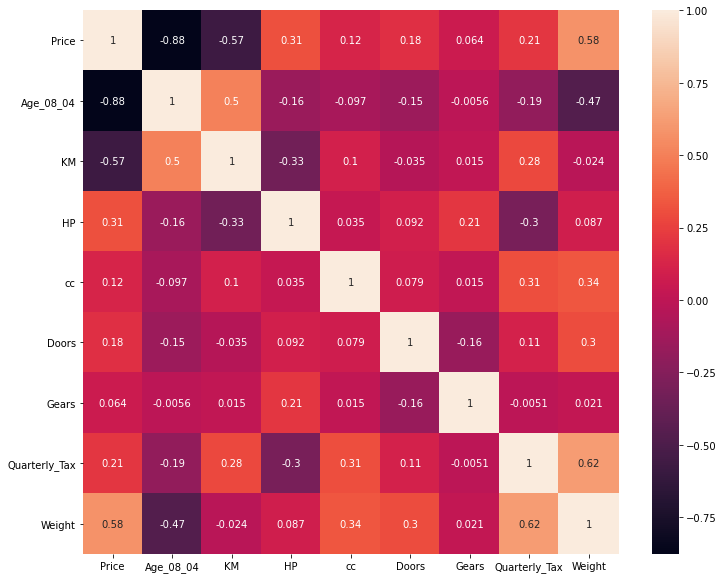

In [37]:
plt.figure(figsize = (12,10))
sns.heatmap(cars_data.corr(), annot = True)
plt.show()

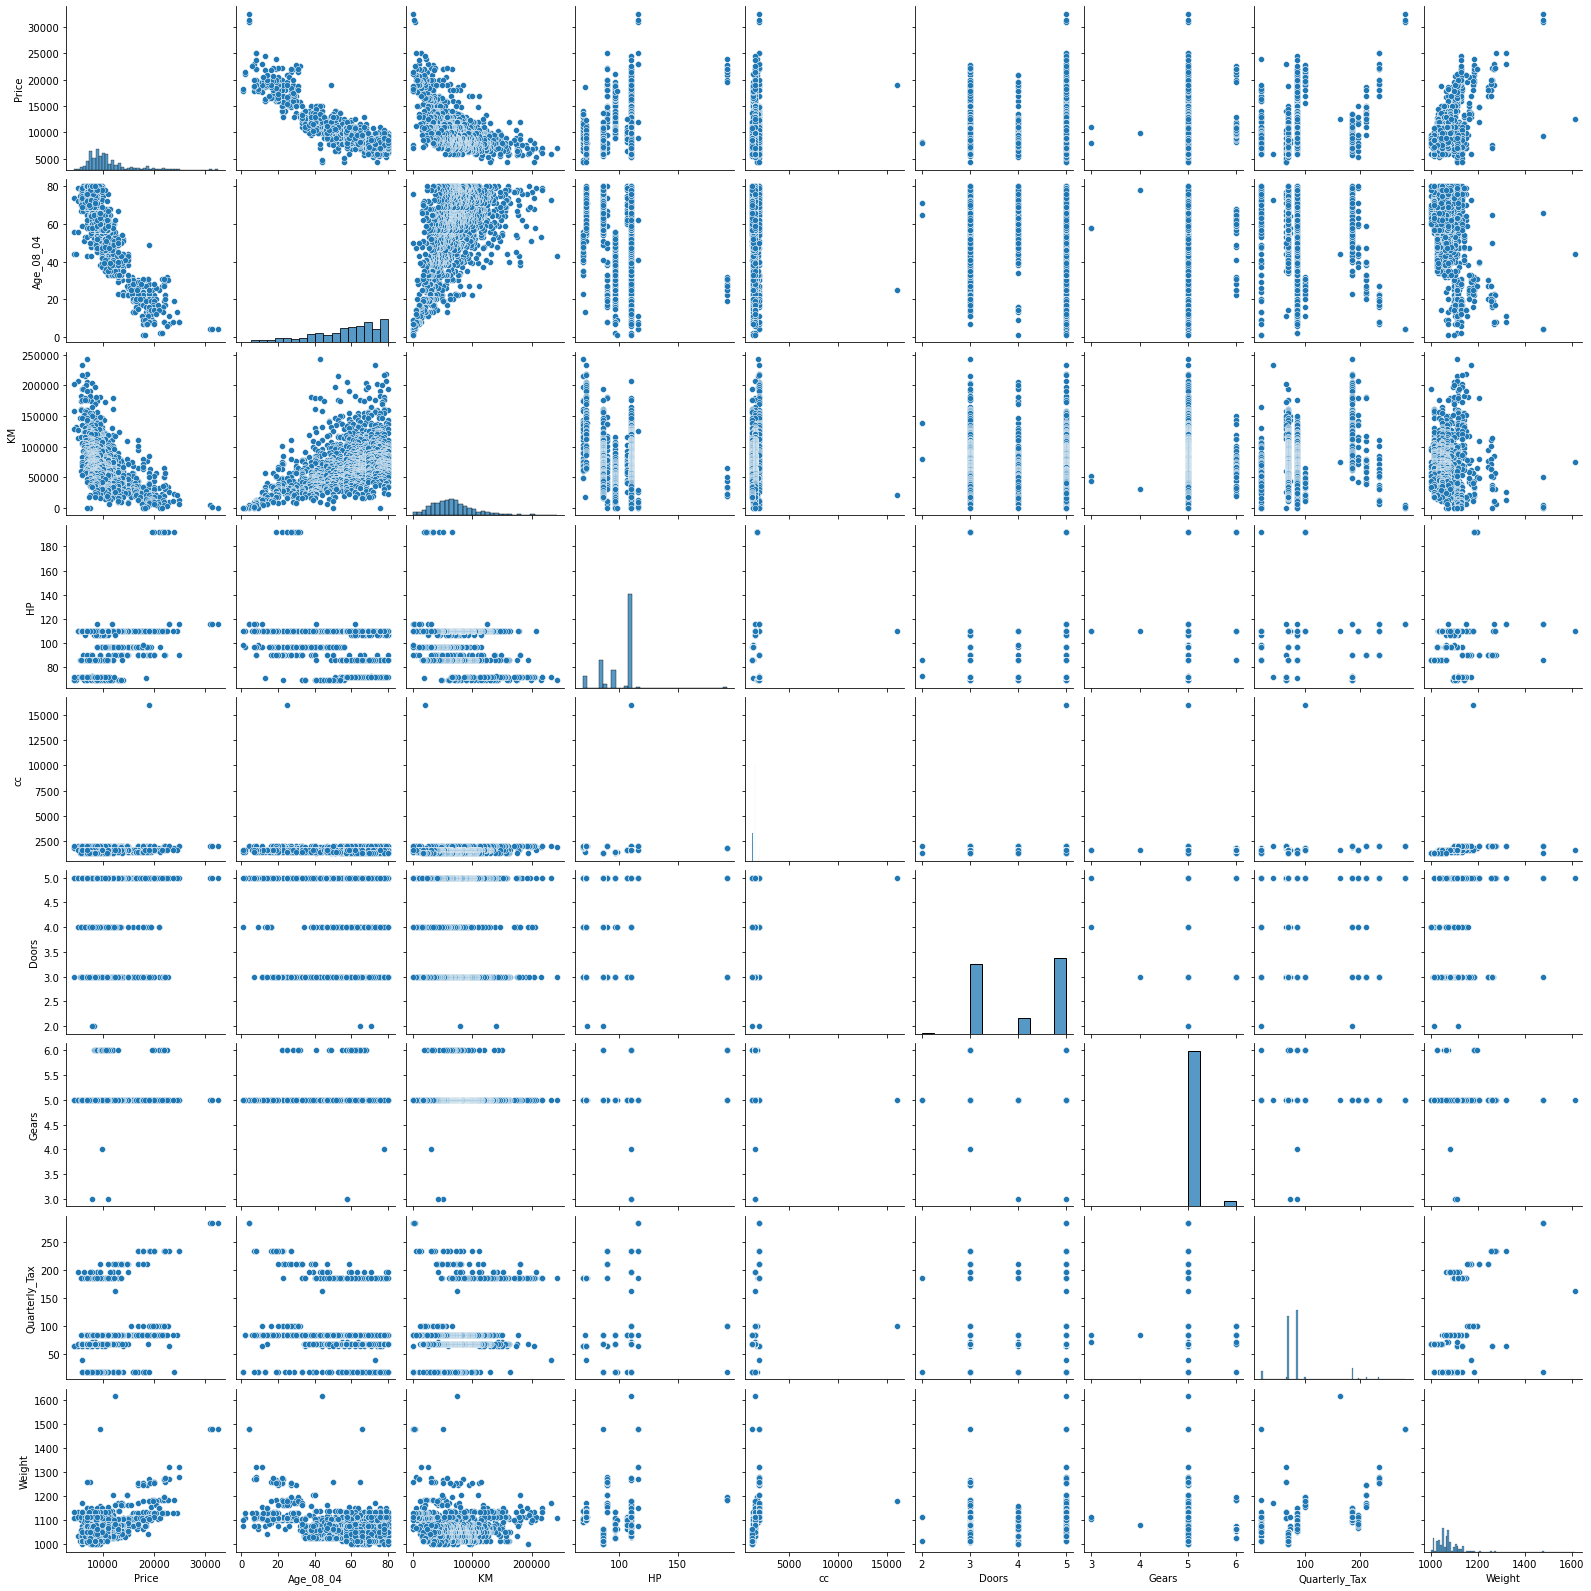

In [38]:
sns.pairplot(cars_data)
plt.show()

##### Model Building

In [42]:
X = cars_data.drop(['Price'], axis = 1)
y = cars_data.Price
X.shape, y.shape

((1435, 8), (1435,))

In [45]:
model = sm.OLS(y, X).fit()
prediction = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.245e+04
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                        0.00
Time:                        16:13:38   Log-Likelihood:                         -12374.
No. Observations:                1435   AIC:                                  2.476e+04
Df Residuals:                    1427   BIC:                                  2.481e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -125.4366      2.444    -51.332      0.000    -130.230    -120.643
KM               -0.0204      0.001    -16.239      0.000      -0.023      -0.018
HP               33.3304      2.795     11.925      0.000      27.848      38.813
cc               -0.1007      0.090     -1.114      0.265      -0.278       0.077
Doors            -6.3603     40.159     -0.158      0.874     -85.138      72.417
Gears            92.5332    148.382      0.624      0.533    -198.537     383.604
Quarterly_Tax     5.6875      1.229      4.629      0.000       3.277       8.098
Weight           13.9761      0.773     18.081      0.000      12.460      15.492
==============================================================================
Omnibus:                      109.540   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.984
Skew:                           0.030   Prob(JB):                    6.24e-125
Kurtosis:                       6.092   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Few variables have not acceptable p value. Thus we could have Multicollinearity issue in our Data Frame.

##### Handling Multicollinearity

In [49]:
#Finding Cook's Distance
inf = model.get_influence()
inf.summary_frame().sort_values('cooks_d', ascending = False)

,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,-0.287213,-2.338772e+00,-2.772129,2.600592e+01,0.644975,9.124783e-01,-4.265825,-3.598188,8.153999e+01,7.633772,0.917992,25.540555,7.791853,26.069452
221,-0.253511,-2.144529e-02,0.170037,4.179101e-01,0.552787,1.569527e+00,0.547497,-1.686047,3.705074e-01,-6.126430,0.073192,-1.721644,-6.206448,-1.744131
960,-0.208003,3.842423e-02,0.441589,1.977091e-01,0.538733,9.935350e-01,0.783167,-1.261203,2.074678e-01,-4.094812,0.090070,-1.288310,-4.117639,-1.295492
109,0.105225,-3.011852e-01,0.119567,-1.942458e-01,-0.224095,-6.191548e-01,0.343401,0.569500,1.272359e-01,5.002263,0.039089,1.008904,5.044938,1.017511
601,-0.212757,3.193334e-01,0.383540,-1.100947e-01,0.404348,5.515317e-01,0.426138,-0.747833,9.669677e-02,-5.588608,0.024170,-0.879531,-5.648809,-0.889005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,0.000150,1.669291e-05,0.000127,2.853871e-05,0.000018,-3.168636e-05,0.000020,-0.000046,1.023153e-08,0.006055,0.002228,0.000286,0.006053,0.000286
1433,-0.000146,1.981292e-04,0.000111,1.291516e-05,0.000055,-3.930528e-05,-0.000027,-0.000012,7.995082e-09,-0.003154,0.006388,-0.000253,-0.003153,-0.000253
482,-0.000003,2.194602e-07,-0.000055,2.748044e-07,-0.000105,8.474484e-06,-0.000017,0.000030,3.510541e-09,-0.004154,0.001625,-0.000168,-0.004152,-0.000168
88,0.000057,-2.369949e-05,0.000015,1.400674e-05,0.000038,2.522483e-07,0.000027,-0.000027,7.975656e-10,-0.001038,0.005888,-0.000080,-0.001038,-0.000080


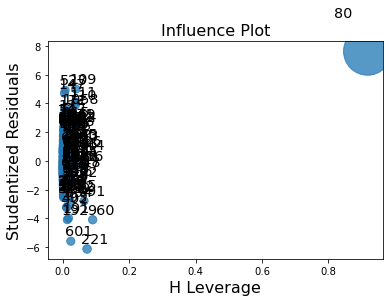

In [55]:
inf.plot_influence()
plt.show()

###### Index 80 has highest Cook's Distance, Thus it will be wise to drop this row from the data set

In [62]:
#Finding variation Inflation factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,vif,features
0,16.392665,Age_08_04
1,7.601207,KM
2,64.894446,HP
3,17.186097,cc
4,21.856114,Doors
5,439.672599,Gears
6,11.021647,Quarterly_Tax
7,543.522036,Weight


###### we need to remove weight or Gears from the features.

In [63]:
X1 = X.drop(['Weight'], axis = 1)

In [64]:
model1 = sm.OLS(y, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.154e+04
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                        0.00
Time:                        16:44:41   Log-Likelihood:                         -12522.
No. Observations:                1435   AIC:                                  2.506e+04
Df Residuals:                    1428   BIC:                                  2.509e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0040      2.678    -49.290      0.000    -137.257    -126.751
KM               -0.0207      0.001    -14.871      0.000      -0.023      -0.018
HP               44.2013      3.025     14.612      0.000      38.267      50.135
cc                0.1824      0.099      1.849      0.065      -0.011       0.376
Doors           272.1994     41.101      6.623      0.000     191.574     352.825
Gears          2424.8250     81.274     29.835      0.000    2265.395    2584.255
Quarterly_Tax    16.7533      1.181     14.188      0.000      14.437      19.070
==============================================================================
Omnibus:                      190.934   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              619.371
Skew:                           0.653   Prob(JB):                    3.20e-135
Kurtosis:                       5.941   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Final model

In [65]:
df = cars_data.drop(cars_data.index[80])
df.shape

(1434, 9)

In [78]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [67]:
X_new = df.drop(['Price', 'Weight'], axis =1)
y_new = df.Price

In [68]:
model_new = sm.OLS(y_new, X_new).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.151e+04
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                        0.00
Time:                        16:49:03   Log-Likelihood:                         -12513.
No. Observations:                1434   AIC:                                  2.504e+04
Df Residuals:                    1427   BIC:                                  2.508e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -131.9582      2.680    -49.241      0.000    -137.215    -126.701
KM               -0.0209      0.001    -14.516      0.000      -0.024      -0.018
HP               43.4509      3.285     13.225      0.000      37.006      49.896
cc                0.3561      0.312      1.140      0.254      -0.257       0.969
Doors           269.9634     41.288      6.539      0.000     188.973     350.954
Gears          2399.9357     91.714     26.168      0.000    2220.027    2579.844
Quarterly_Tax    16.1897      1.523     10.631      0.000      13.202      19.177
==============================================================================
Omnibus:                      190.000   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.500
Skew:                           0.649   Prob(JB):                    4.95e-135
Kurtosis:                       5.944   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Prediction

In [79]:
#1
new_data=pd.DataFrame({'Age_08_04':71,"KM":17016,"HP":86,"cc":1300,"Doors":3,"Gears":5,"Quarterly_Tax":69},index=[0])
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax
0,71,17016,86,1300,3,5,69


In [80]:
model_new.predict(new_data)

0    8401.445698
dtype: float64

In [ ]:
---------------------------------------------------------------------------------------------

In [81]:
#2
X_new.columns

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax'], dtype='object')

In [82]:
model_new.predict([24,41711,90,2000,3,5,210])

array([16792.83269059])